In [1]:
import time

# 時間計測開始
time_sta = time.perf_counter()

# 処理を書く（ここでは5秒停止する）
time.sleep(5)

# 時間計測終了
time_end = time.perf_counter()

# 経過時間（秒）
tim = time_end- time_sta

print(tim)

5.0057020010003725


In [3]:
import time

# 時間計測開始
time_sta = time.time()

# 処理を書く（ここでは1秒停止する）
time.sleep(5)

# 時間計測終了
time_end = time.time()

# 経過時間（秒）
tim = time_end- time_sta

print(tim)

5.0054991245269775


In [2]:
import numpy as np

X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(1)
poly.fit_transform(X)

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.]])

In [6]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [10]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [11]:
import featuretools as ft
data = ft.demo.load_mock_customer()

ModuleNotFoundError: No module named 'featuretools'

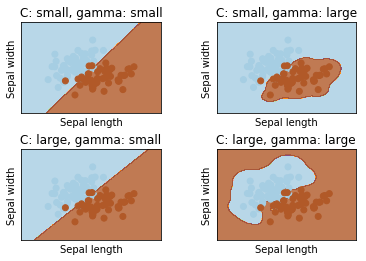

In [18]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from itertools import product

if __name__ == '__main__':
    iris = datasets.load_iris()
    # 特徴量は最初の2つ, クラスラベルも最初の2つを使う
    X = iris.data[:100, :2]
    # 特徴量にノイズを加える
    E = np.random.uniform(0, 1.0, size=np.shape(X))
    X += E
    y = iris.target[:100]
    #meshのステップサイズ
    h = 0.02
    #コストパラメータ
    Cs = [2 ** -5, 2 ** 15]
    # RBFカーネルのパラメータ
    gammas = [2 ** -15, 2 ** 3]

    svms = [svm.SVC(C=C, gamma=gamma).fit(X, y) for C, gamma in product(Cs, gammas)]
    titles = ["C: small, gamma: small", "C: small, gamma: large",
        "C: large, gamma: small", "C: large, gamma: large"]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    for i, clf in enumerate(svms):
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])
    plt.show()

In [23]:
%time
print("Hello world")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs
Hello world


In [24]:
%time 2**128

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


340282366920938463463374607431768211456